In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from operator import add
from termcolor import colored

In [3]:
df = pd.read_json("drive/MyDrive/NLP/Digital_Music.json", lines=True)

In [4]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN


In [4]:
df = df.dropna(subset=['reviewText'])
df.shape

(1582629, 12)

In [ ]:
df.iloc[0]['reviewText']

'This is a great cd full of worship favorites!!  All time great Keith green songs. His best album by far.'

In [5]:
#number of unique products (asin = Amazon Standard Identification Number)
df['asin'].nunique()

456992

In [13]:
best_seller=pd.DataFrame(df['asin'].value_counts()).sort_values(by='asin',ascending=False)
best_seller = best_seller.rename(columns={"asin": "nb_sales"})
best_seller.head(5)
#best_seller.loc[['B00YZ3PPQ2']]

,nb_sales
B0135P6PZA,3411
B00M8JCW3E,3243
B00CZF8B68,2819
B00NPZI1ZS,2195
B00U3WJHCW,2046


The 5 best digital music sold are:
<br> 1st: Hamilton (Original Broadway Cast Recording) 
<br> 2nd: Partners
<br> 3rd: Unknown product
<br> 4th: Endless River (Pink Floyd) 
<br> 5th: Stages (Josh Groban)

Now we are interested in which products have the worse ratings

In [20]:
worse_ratings = pd.DataFrame(df.groupby('asin')['overall'].mean()).sort_values(by='overall',ascending=True)

In [21]:
worse_ratings = worse_ratings.join(best_seller)
worse_ratings.iloc[:5]

,overall,nb_sales
asin,,
B005BNMF68,1.0,1
B00YZ3PPQ2,1.0,1
B0013AQIU2,1.0,1
B00LVZ70A6,1.0,1
B0041E0KRY,1.0,1


We can see that the worst rated products have only 1 sale so it not necessarily informative. Let us look instead at the worst products among those which have at least 10 reviews.

In [25]:
worse_ratings[worse_ratings['nb_sales'] > 9].head(5)

,overall,nb_sales
asin,,
B00S33PD6W,1.000000,73
B00NIJY63W,1.000000,44
B012VAF74U,1.000000,11
B00DO4LN82,1.015625,64
B00B5JY7HM,1.083333,12


In [ ]:
# Mean/max/min length of reviews in characters
df['reviewText'].str.len().mean()
df['reviewText'].str.len().max()
df['reviewText'].str.len().max()
#len(df.iloc[0]['reviewText'])

213.10512002497111

In [ ]:
type(df.reviewText)
type(df.style)

pandas.core.series.Series

In [ ]:
df.groupby('style').size()
#Je ne sais pas pourquoi je n'arrive pas à groupby ici

TypeError: ignored

In [ ]:
df['style'].drop_duplicates().tolist()
#Peut-être intéressant de comparer selon le type de support de musique, mais je n'arrive pas à faire de stats desc sur style car le format est bizarre

[{'Format:': ' Audio CD'},
 {'Format:': ' MP3 Music'},
 {'Format:': ' Audio Cassette'},
 nan,
 {'Format:': ' Paperback'},
 {'Format:': ' DVD'},
 {'Format:': ' VHS Tape'},
 {'Format:': ' Vinyl'},
 {'Format:': ' Blu-ray'},
 {'Format:': ' DVD Audio'},
 {'Format:': ' Vinyl Bound'},
 {'Format:': ' Amazon Video'},
 {'Format:': ' USB Memory Stick'},
 {'Format:': ' Blu-ray Audio'},
 {'Format:': ' Hardcover'},
 {'Format:': ' Spiral-bound'},
 {'Format:': ' DVD-ROM'},
 {'Format:': ' Audible Audiobook'},
 {'Format:': ' Kindle Edition'},
 {'Format:': ' Laser Disc'},
 {'Format:': ' CD-ROM'},
 {'Format:': ' Health and Beauty'},
 {'Color:': ' Black'},
 {'Format:': ' Home'},
 {'Format:': ' Personal Computers'},
 {'Format:': ' Unknown Binding'},
 {'Format:': ' Perfect Paperback'},
 {'Format:': ' Unbound'},
 {'Format:': ' Accessory'},
 {'Format:': ' Grocery'},
 {'Format:': ' Apparel'},
 {'Format:': ' Kitchen'},
 {'Format:': ' Office Product'},
 {'Format:': ' CD Video'},
 {'Color:': ' Multicolor', 'Size:'

(0.0, 1000.0)

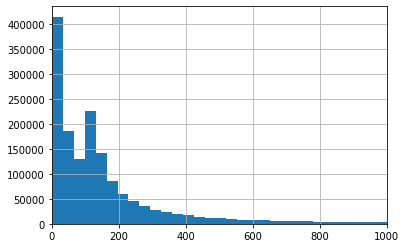

In [3]:
%matplotlib inline
df['reviewText'].dropna().apply(len).hist(bins=1000).set_xlim((0,1000))

In [ ]:
df['overall'].describe()

count    1.584082e+06
mean     4.660555e+00
std      8.440314e-01
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [ ]:
df.groupby(df.overall).size()

overall
1      43108
2      23551
3      57347
4     179929
5    1280147
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


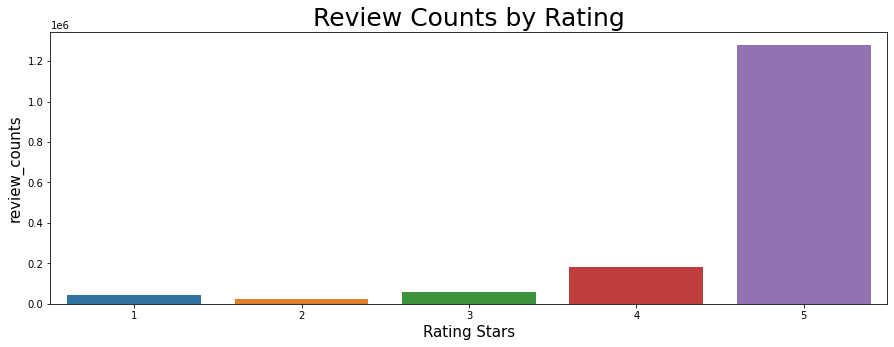

In [5]:
rating=pd.DataFrame(df['overall'].value_counts()).reset_index().sort_values(by='index',ascending=True)
plt.figure(figsize=(15,5))
sns.barplot(rating['index'],rating['overall'])
plt.xticks(fontsize=10)
plt.xlabel('Rating Stars',fontsize=15)
plt.ylabel('review_counts',fontsize=15)
plt.title('Review Counts by Rating',fontsize=25)
plt.show()

In [ ]:
df.groupby(df.overall).size()*100/df.groupby(df.overall).size().sum()

overall
1     2.721324
2     1.486729
3     3.620204
4    11.358566
5    80.813178
dtype: float64

We can see that more than 90% of the products have good rates, which can make difficult the prediction of bad rates. To avoid this problem we will use a resampling method.

Now we are interested in sequence of words that appear frequently in good vs bad reviews.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus) #only bigrams
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#source:https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [7]:
common_words_good = get_top_n_bigram(df[df['overall'] > 3]['reviewText'], 20)
common_words_bad= get_top_n_bigram(df[df['overall'] <= 3]['reviewText'], 20)

dict_good_words = dict(common_words_good)
dict_bad_words = dict(common_words_bad)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


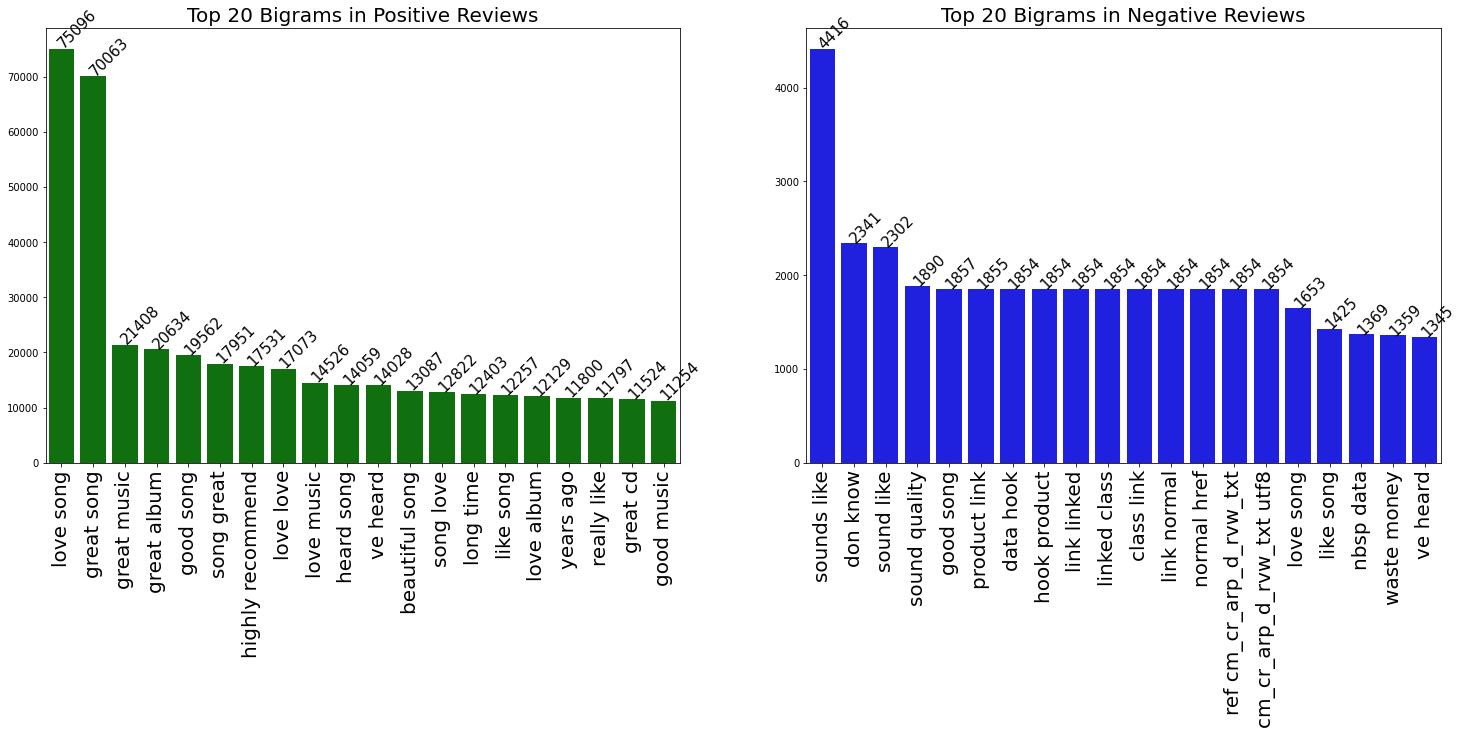

In [32]:
# good reviews bigrams
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
x_good=[x[0] for x in common_words_good]
y_good=[x[1] for x in common_words_good]
sns.barplot(x_good,y_good,color='g')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_good)):
    plt.text(i-0.2,y_good[i]+100,'{}'.format(y_good[i]),size=15,rotation=45)

# bad reviews bigrams    
plt.subplot(1,2,2)
x_bad=[x[0] for x in common_words_bad]
y_bad=[x[1] for x in common_words_bad]
sns.barplot(x_bad,y_bad,color='b')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_bad)):
    plt.text(i-0.2,y_bad[i],'{}'.format(y_bad[i]),size=15,rotation=45)

In [ ]:
#good songs
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(dict_good_words)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

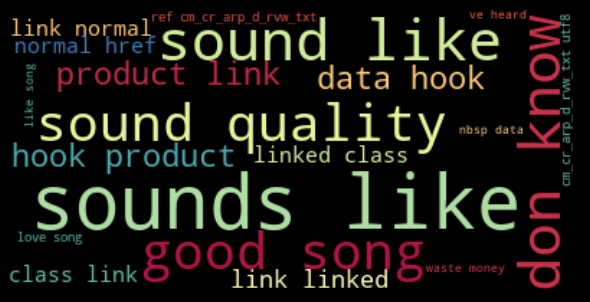

In [15]:
#bad songs
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(dict_bad_words)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Tokenization (before any preprocessing) ##

In [ ]:
#count the number of words in corpus
arr = df.reviewText.drop_duplicates().apply(lambda x: x.split(' ')).array
arr = [ x for X in arr for x in X]
print(arr[:5])
print('%s "words" in the contents' % (len(set(arr))))

['This', 'is', 'a', 'great', 'cd']
1662499 "words" in the contents


In [ ]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
import pdb # python debugger
for tok in tqdm(tokenizers):
  print('Using tokenizer: %s' % (tok))
  arr = df.reviewText.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # the set object transforms a list to the set of unique elements in the list :
  print('The 30 first tokens: %s' % (arr[:30]) )
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))
  print('='*5)  

  0%|          | 0/3 [00:00<?, ?it/s]

Using tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fa8a7139110>
The 30 first tokens: ['This', 'is', 'a', 'great', 'cd', 'full', 'of', 'worship', 'favorites', '!', '!', 'All', 'time', 'great', 'Keith', 'green', 'songs.', 'His', 'best', 'album', 'by', 'far', '.', 'So', 'creative', '!', 'Love', 'his', 'music', '-']
Vocabulary size: 685413 with <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fa8a7139110> tokenizer
=====
Using tokenizer: <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fa8a7139d90>
The 30 first tokens: ['This', 'is', 'a', 'great', 'cd', 'full', 'of', 'worship', 'favorites', '!', '!', 'All', 'time', 'great', 'Keith', 'green', 'songs.', 'His', 'best', 'album', 'by', 'far', '.', 'So', 'creative', '!', 'Love', 'his', 'music', '-']
Vocabulary size: 660675 with <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fa8a7139d90> tokenizer
=====
Using tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7fa8a7139410>
The 30 first tokens: ['T

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

for summary in df.summary[:20]:
  doc = nlp(summary)
  displacy.render(doc, style="ent",jupyter=True)

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


# Data processing

In [11]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
sw_list = stopwords.words('english')
print(sw_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
#We add punctuation
sw_list += list(string.punctuation)
print(sw_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
df['reviewText']=df['reviewText'].apply(str)

In [20]:
nltk.download('punkt')
def Tokenizer(data):
    tokens = nltk.word_tokenize(data)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_list]
    return stopwords_removed
processed_data = list(map(Tokenizer,df.reviewText))
len(processed_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1582629

In [13]:
# tokenization
def tokenization(review):
    tokens = nltk.word_tokenize(review) # tokenization
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_list]# stop workds removal
    return stopwords_removed

# Stemming: to keep only the root of the word
from nltk.stem import PorterStemmer #use Porter algorithm (Porter, 1980)
ps = PorterStemmer() 
# create a function stemming() and loop through each word in a review
def stemming(review):
    stemmed_review=[]
    for w in review:
        stemmed_review.append(ps.stem(w))
    return stemmed_review

# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Lemmatization : similar to stemming, but with the goal of recovering the lemma (ex: returns "see" when confronting to "saw")
def lemmatization(review):
    lemma_list=[]
    for word in review:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

# Conbime all functions above and obtian cleaned text data 
def data_preprocessing(review):
    #tokenization, stop words removal, punctuation marks removel
    tokenized_reviews=list(map(tokenization,review))
    # stemming
    stemming_reviews=list(map(stemming,tokenized_reviews))
    # lemmatization
    lemma_reviews=list(map(lemmatization,stemming_reviews))
    return lemma_reviews

In [18]:
sample = df.sample(frac=0.05, replace = False)

In [19]:
sample.shape

(79131, 12)

In [20]:
sample['cleaned_review'] = data_preprocessing(sample['reviewText'])

In [21]:
sample.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,cleaned_review
975063,4,True,"07 12, 2015",A1SVSUJVERPK75,B003SCAF48,{'Format:': ' Audio CD'},BARBARA BEDFORD,PROBLEM WITH CD KEEPS SKIPPING,Four Stars,1436659200,NaN,NaN,"[problem, cd, keep, skip]"
1518110,3,True,"08 18, 2016",A17OVHJGY7CPIQ,B016FQOQRU,{'Format:': ' Audio CD'},msafford,The snippets I had heard sounded promising. Gr...,Promising. Band needs to decide on their style.,1471478400,NaN,NaN,"[snippet, hear, sound, promis, great, vocal, s..."
133006,5,True,"12 15, 2014",A3C5REWKUEDQ8G,B00136RPYE,{'Format:': ' MP3 Music'},StarMaster,"We lost Jose this year, but his song will alwa...","We lost Jose this year, but his song will ...",1418601600,NaN,NaN,"[lose, jose, year, song, alway, remind, us, ch..."
1236576,1,True,"08 30, 2017",A13FB29RHK9BVK,B00DAB8OAO,NaN,Geoffrey P.,"their song on youtube is beautiful, but this o...",They performed this song better on Youtube,1504051200,NaN,NaN,"[song, youtub, beauti, one, ruin, later, back,..."
707007,5,True,"09 11, 2014",A1EWJYUF4AXIGO,B000WGUKCU,{'Format:': ' Audio CD'},Wade Cottingham,This sounds FANTASTIC. It's the same masterin...,FANTASTIC sounding collection of hits,1410393600,3,NaN,"[sound, fantast, 's, master, 2002, dsd, cd, 's..."


In [10]:
#add new column corresponding to the cleaned review and the length of the cleaned review
df['cleaned_review'] = data_preprocessing(df['reviewText'])
df['review_length'] = len(df['cleaned_review'])

LookupError: ignored

In [ ]:
#Are there differences in review length according to the grade attributed to the product?
print('The average lenght of bad reviews is: %s' % (df[df['overall'] <= 3]['review_length'].mean()) )
print("The average lenght of bad reviews is: {0}".format(df[df['overall'] <= 3]['review_length'].mean())
df[df['overall'] <= 3]['review_length'].mean()
df[df['overall'] >= 4]['review_length'].mean()